# Trees in Paris

## 0) Environment setup

Let's first check that we are using a virtual environment:

In [1]:
import os
assert os.environ.get('VIRTUAL_ENV', None) is not None, "Virtual environment is not activated. Please run this notebook after activation"
print('Virtual environment is activated')    

Virtual environment is activated


Then import useful librairies:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

Now we can import the data from the csv file and have a first look at it.

----------
## 1) Dataset general presentation

In [3]:
arbres = pd.read_csv('p2-arbres-fr.csv', sep=";")
shape = arbres.shape
print(f'\nDataframe contains {arbres.shape[0]} rows and {shape[1]} columns.\n\n')
arbres


Dataframe contains 200137 rows and 18 columns.




,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200132,2024741,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170151,NaN,Castanea,fargesii,NaN,0,0,NaN,0.0,48.821957,2.456264
200133,2024742,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170152,Arbre aux mouchoirs,Davidia,involucrata,NaN,0,0,NaN,0.0,48.823254,2.457935
200134,2024743,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170153,Peuplier,Populus,simonii,NaN,0,0,NaN,0.0,48.822907,2.457970
200135,2024744,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170154,Chêne,Quercus,n. sp.,NaN,0,0,NaN,0.0,48.822522,2.455956


Cheking the data type:

In [4]:
arbres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200136 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   complement_addresse  30902 non-null   object 
 5   numero               0 non-null       float64
 6   lieu                 200137 non-null  object 
 7   id_emplacement       200137 non-null  object 
 8   libelle_francais     198640 non-null  object 
 9   genre                200121 non-null  object 
 10  espece               198385 non-null  object 
 11  variete              36777 non-null   object 
 12  circonference_cm     200137 non-null  int64  
 13  hauteur_m            200137 non-null  int64  
 14  stade_developpement  132932 non-null  object 
 15  remarquable      

The data already has an index column, so we can use it as the Dataframe index.  
We can also get rid of the "numero" column that is empty (0 non-null value).

In [5]:
arbres.set_index('id', inplace=True)
arbres.drop(labels='numero', axis=1, inplace=True)

What is the proportion of missing values ?

In [6]:
percentages = pd.DataFrame(arbres.isna().sum(axis=0) / arbres.shape[0], columns = ['Missing values'])
percentages_styled = percentages.style.format({'Missing values': '{:.2%}'})

percentages_styled

,Missing values
type_emplacement,0.00%
domanialite,0.00%
arrondissement,0.00%
complement_addresse,84.56%
lieu,0.00%
id_emplacement,0.00%
libelle_francais,0.75%
genre,0.01%
espece,0.88%
variete,81.62%


Missing values are mainly descriptive ones, while numerical data (circonference_cm, hauteur_m) are complete. So for the moment there is no need to handle missing values.

In [7]:
arbres.describe()

,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,200137.000000,200137.000000,137039.000000,200137.000000,200137.000000
mean,83.380479,13.110509,0.001343,48.854491,2.348208
std,673.190213,1971.217387,0.036618,0.030234,0.051220
min,0.000000,0.000000,0.000000,48.742290,2.210241
25%,30.000000,5.000000,0.000000,48.835021,2.307530
50%,70.000000,8.000000,0.000000,48.854162,2.351095
75%,115.000000,12.000000,0.000000,48.876447,2.386838
max,250255.000000,881818.000000,1.000000,48.911485,2.469759


Standard deviation and max values for columns "circonference_cm" and "hauteur_m" seem inconsistent, let's draw boxplots to dive further and find outliers.

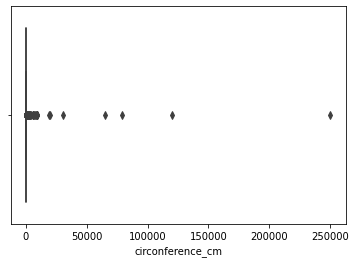

In [8]:
circ = sns.boxplot(x=arbres["circonference_cm"])

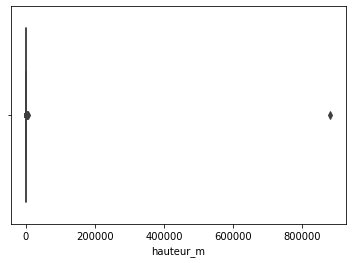

In [9]:
haut = sns.boxplot(x=arbres["hauteur_m"])

We'll first process the "hauteur_m" values.  
The value above 800,000 is of course inconsistent and squashes the other ones on the graph, so we can drop this outlier value for the col "hauteur_m". I choose to drop the entire row instead of just dropping the wrong height, since all other datas have values, and that the dataset is big.

In [10]:
highest = arbres['hauteur_m'].idxmax()
arbres.loc[highest]
arbres.drop([highest], inplace=True)

Let's plot "hauteur_m" again:

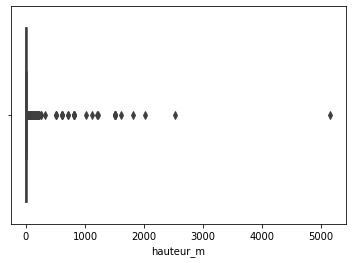

In [11]:
haut = sns.boxplot(x=arbres["hauteur_m"])

Data are still squashed. It is likely that some values were wrongly input in centimeters instead of meters. But not all of them probably since the data is supposed to be in meters.  

The highest tree in Paris is 30m high [(source)](https://agriculture.gouv.fr/le-plus-grand-arbre-de-paris-veille-sur-le-78-rue-de-varenne), let's use this value as the limit. If a value is bigger than 30 then it is necessarily in centimeters.

So, all trees heights lower than 30 should be multiplied by 100 to make sense by becoming centimeters, and the column must be renamed "hauteur_cm". and any value bigger than 3000 must be dropped.

In [12]:
# extracting trees under 30 and turning them into cm:
max_30 = arbres[arbres['hauteur_m']<=30]
max_30['hauteur_m'] *= 100

#deleting trees under 30 in arbre to replace them with the value in cm
arbres.drop(arbres[arbres['hauteur_m']<=30].index, inplace=True)

# concatenating max_30 and arbres
arbres.append(max_30)

#dropping values bigger than 3000
arbres.drop(arbres[arbres['hauteur_m']>3000].index, inplace=True)

#renaming column "hauteur_m" as "hauteur_cm"
arbres.rename(columns={"hauteur_m": "hauteur_cm"}, inplace=True)

arbres.describe()

<ipython-input-12-a564ba8d668a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_30['hauteur_m'] *= 100


,circonference_cm,hauteur_cm,remarquable,geo_point_2d_a,geo_point_2d_b
count,571.000000,571.000000,535.000000,571.000000,571.000000
mean,103.075306,136.117338,0.020561,48.840815,2.347942
std,403.333134,268.026318,0.142041,0.026539,0.038837
min,0.000000,31.000000,0.000000,48.809593,2.241448
25%,10.000000,55.000000,0.000000,48.816880,2.336520
50%,35.000000,78.000000,0.000000,48.834932,2.346788
75%,105.000000,100.000000,0.000000,48.857557,2.365442
max,7540.000000,2525.000000,1.000000,48.908945,2.461321


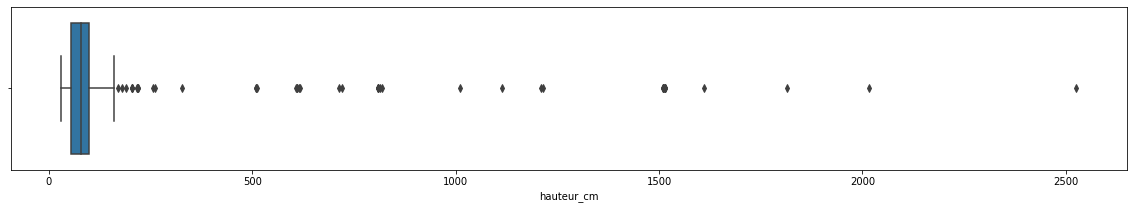

In [14]:
# plotting with edited data
plt.figure(figsize=(20,3))
haut = sns.boxplot(x=arbres["hauteur_cm"])

<AxesSubplot:xlabel='hauteur_cm', ylabel='Count'>

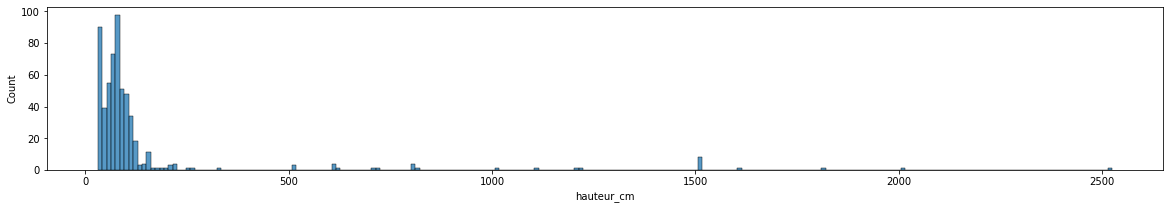

In [22]:
plt.figure(figsize=(20,3))
sns.histplot(arbres["hauteur_cm"])

Now let's process the 'circonference_cm' values. We'll take a more direct way by assuming that any value larger than (mean + 2 * std) is out of 95% of the data and then inconsistent.

In [15]:
circ_mean = arbres['circonference_cm'].mean()
circ_std = arbres['circonference_cm'].std()
max = circ_mean + (2*circ_std)
arbres = arbres[arbres['circonference_cm']<max]

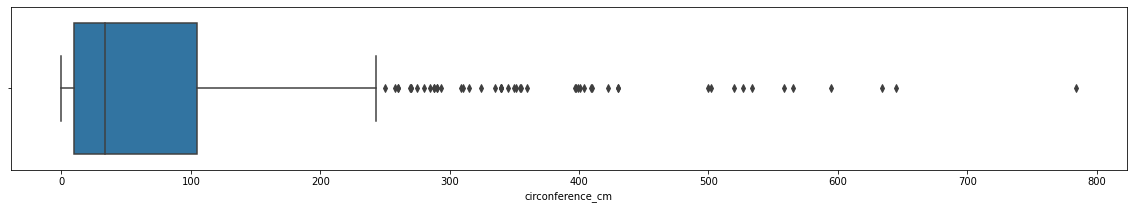

In [16]:
plt.figure(figsize=(20,3))
circ = sns.boxplot(x=arbres["circonference_cm"])

<AxesSubplot:xlabel='circonference_cm', ylabel='Count'>

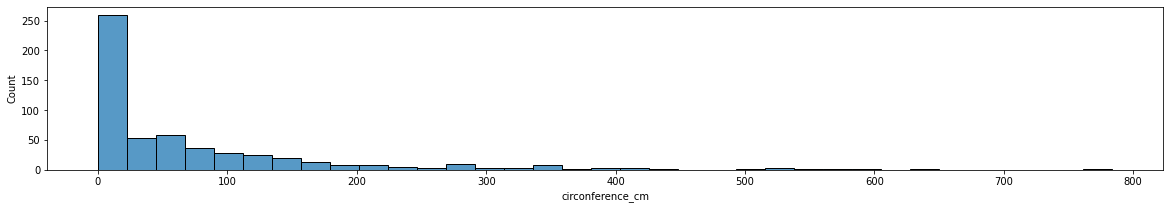

In [23]:
plt.figure(figsize=(20,3))
sns.histplot(arbres["circonference_cm"])

Now let's link hauteur and circonference of each tree:

<AxesSubplot:xlabel='hauteur_cm', ylabel='circonference_cm'>

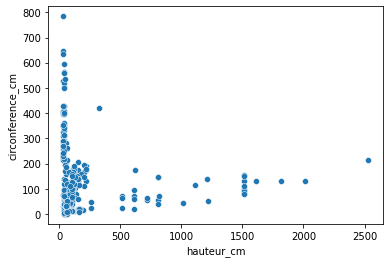

In [24]:
sns.scatterplot(data=arbres, x='hauteur_cm', y='circonference_cm')

The highest values in circonference were not irrelevant *per se*, but when analysed in conjunction with height, many inconsistencies appear.